# Spotify EDA of Top Hits Songs (2000-2019)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
audio_features = pd.read_csv("Tophits2000-2019.csv")
audio_features

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode  \
0        False  2000          77         0.751   0.834    1    -5.444     0   
1        False  1999          79         0.434   0.897    0    -4.918     1   
2        False  1999          66         0.529   0.496    7    -9.007     1   
3        False  2000          78         0.551   0.913    0    -4.063     0   
4        False  2000          65         0.614   0.928    8    -4.806     0   
...        ...   ...         ...           ...     ...  ...       ...   ...   
1995     False  2019          79         0.842   0.734    1    -5.065     0   
1996     False  2019          78         0.552   0.702    9    -5.707     1   
1997     False  2019          69         0.847   0.678    9    -8.635     1   
1998     False  2019          75         0.741   0.520    8    -7.513     1   
1999     False  2019          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.3000          0.000018    0.3550    0.894   95.053   
1          0.0488        0.0103          0.000000    0.6120    0.684  148.726   
2          0.0290        0.1730          0.000000    0.2510    0.278  136.859   
3          0.0466        0.0263          0.000013    0.3470    0.544  119.992   
4          0.0516        0.0408          0.001040    0.0845    0.879  172.656   
...           ...           ...               ...       ...      ...      ...   
1995       0.0588        0.0427          0.000000    0.1060    0.952  137.958   
1996       0.1570        0.1170          0.000021    0.1050    0.564  169.994   
1997       0.1090        0.0669          0.000000    0.2740    0.811   97.984   
1998       0.0656        0.4500          0.000002    0.2220    0.347  102.998   
1999       0.0395        0.1920          0.002440    0.0863    0.553  120.042   

                 genre  
0                  pop  
1            rock, pop  
2         pop, country  
3          rock, metal  
4                  pop  
...                ...  
1995               pop  
1996               pop  
1997  hip hop, country  
1998               pop  
1999           hip hop  

[2000 rows x 18 columns]

In [2]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [3]:
audio_features.isna().any().any()

False

In [4]:
dupes = audio_features.duplicated(keep=False)
dupes

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [5]:
# Check the years of release present in the dataset
audio_features.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [6]:
# Storing all songs released before the year 2000 and after the year 2019 into a new dataframe
df_years_drop = audio_features[(audio_features['year'] <2000) | (audio_features['year'] > 2019)].index
# Removing songs from 1998, 1999 and 2020 from the original dataframe
audio_features = audio_features.drop(df_years_drop)
# Checking once again the values of the years now in the dataframe
audio_features.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014])

In [7]:
# Creating a function that converts milliseconds to minutes and seconds
def ms_to_min_sec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

audio_features['min:sec'] = audio_features['duration_ms'].apply(ms_to_min_sec)

In [8]:
audio_features

artist                                    song  duration_ms  \
0      Britney Spears                  Oops!...I Did It Again       211160   
3            Bon Jovi                            It's My Life       224493   
4              *NSYNC                             Bye Bye Bye       200560   
6              Eminem                     The Real Slim Shady       284200   
7     Robbie Williams                                 Rock DJ       258560   
...               ...                                     ...          ...   
1995   Jonas Brothers                                  Sucker       181026   
1996     Taylor Swift                            Cruel Summer       178426   
1997     Blanco Brown                              The Git Up       200593   
1998        Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999      Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode  \
0        False  2000          77         0.751   0.834    1    -5.444     0   
3        False  2000          78         0.551   0.913    0    -4.063     0   
4        False  2000          65         0.614   0.928    8    -4.806     0   
6         True  2000          86         0.949   0.661    5    -4.244     0   
7        False  2000          68         0.708   0.772    7    -4.264     1   
...        ...   ...         ...           ...     ...  ...       ...   ...   
1995     False  2019          79         0.842   0.734    1    -5.065     0   
1996     False  2019          78         0.552   0.702    9    -5.707     1   
1997     False  2019          69         0.847   0.678    9    -8.635     1   
1998     False  2019          75         0.741   0.520    8    -7.513     1   
1999     False  2019          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.3000          0.000018    0.3550    0.894   95.053   
3          0.0466        0.0263          0.000013    0.3470    0.544  119.992   
4          0.0516        0.0408          0.001040    0.0845    0.879  172.656   
6          0.0572        0.0302          0.000000    0.0454    0.760  104.504   
7          0.0322        0.0267          0.000000    0.4670    0.861  103.035   
...           ...           ...               ...       ...      ...      ...   
1995       0.0588        0.0427          0.000000    0.1060    0.952  137.958   
1996       0.1570        0.1170          0.000021    0.1050    0.564  169.994   
1997       0.1090        0.0669          0.000000    0.2740    0.811   97.984   
1998       0.0656        0.4500          0.000002    0.2220    0.347  102.998   
1999       0.0395        0.1920          0.002440    0.0863    0.553  120.042   

                 genre min:sec  
0                  pop    3:31  
3          rock, metal    3:44  
4                  pop    3:20  
6              hip hop    4:44  
7            pop, rock    4:18  
...                ...     ...  
1995               pop     3:1  
1996               pop    2:58  
1997  hip hop, country    3:20  
1998               pop    2:51  
1999           hip hop    3:35  

[1958 rows x 19 columns]

# Number of Songs Released per Year

In [9]:
songs_per_year = (audio_features.year.value_counts().rename_axis('year').reset_index(name = 'songs'))
songs_per_year

year  songs
0   2012    115
1   2017    111
2   2001    108
3   2018    107
4   2010    107
5   2014    104
6   2005    104
7   2011     99
8   2016     99
9   2015     99
10  2003     97
11  2008     97
12  2004     96
13  2006     95
14  2007     94
15  2002     90
16  2019     89
17  2013     89
18  2009     84
19  2000     74

/var/folders/rm/b67f92y96cv78lmnchtgg2hm0000gn/T/ipykernel_37747/2597984530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')


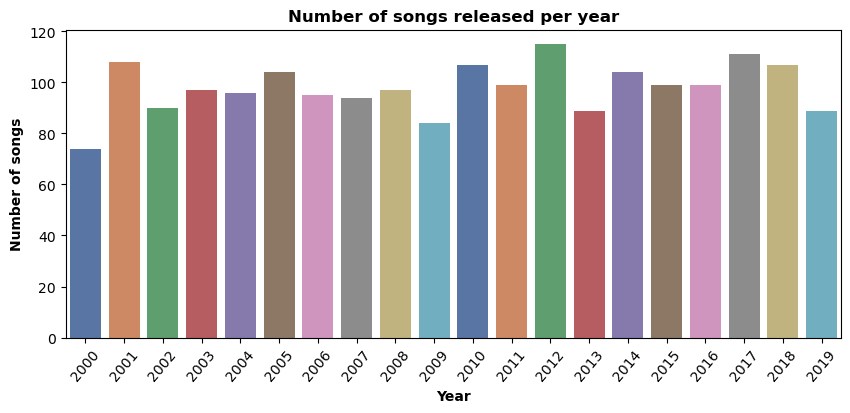

In [10]:
# Plotting songs_per_year in a bar chart
plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 10, fontweight = 'bold')
plt.xlabel('Year', size= 10, fontweight = 'bold')
plt.title('Number of songs released per year', size = 12, fontweight = 'bold')
plt.xticks(rotation = 50)
plt.savefig('NumSongsReleased.png')
plt.show()

In [11]:
# Convert 'min:sec' to seconds for comparison
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Create a new column with seconds
audio_features['duration_seconds'] = audio_features['min:sec'].apply(convert_to_seconds)

# Top 10 longest songs
longest_songs = audio_features[['song','artist','year','min:sec','duration_seconds']].nlargest(10, 'duration_seconds')
longest_songs = longest_songs.drop(columns=['duration_seconds'])

# Top 10 shortest songs
shortest_songs = audio_features[['song','artist','year','min:sec','duration_seconds']].nsmallest(10, 'duration_seconds')
shortest_songs = shortest_songs.drop(columns=['duration_seconds'])

# View tables
display(longest_songs)
display(shortest_songs)


song                 artist  \
1381                                          Mirrors      Justin Timberlake   
140                                    Another Chance          Roger Sanchez   
706   What Goes Around.../...Comes Around (Interlude)      Justin Timberlake   
760        LoveStoned / I Think She Knows (Interlude)      Justin Timberlake   
242                                        Days Go By            Dirty Vegas   
1825                                  Te Boté - Remix             Nio Garcia   
102                                              Stan                 Eminem   
516                                         Galvanize  The Chemical Brothers   
499                            You Don't Know My Name            Alicia Keys   
333                                       Magic Stick               Lil' Kim   

      year min:sec  
1381  2013     8:4  
140   2000    7:32  
706   2006    7:28  
760   2006    7:24  
242   2002    7:12  
1825  2018    6:57  
102   2000    6:44  
516   2005    6:33  
499   2003     6:6  
333   2019    5:59

song        artist  year min:sec
1931   Old Town Road     Lil Nas X  2019    1:53
1939          Panini     Lil Nas X  2019    1:54
1752  Jocelyn Flores  XXXTENTACION  2017    1:59
1853         changes  XXXTENTACION  2018     2:1
1746      Gucci Gang      Lil Pump  2017     2:4
1926         My Type      Saweetie  2019     2:6
937            Intro        The xx  2009     2:7
1966        Thotiana      Blueface  2018     2:9
1891            Mine         Bazzi  2018    2:11
1927          Ransom     Lil Tecca  2019    2:11

# Explicit Content

In [12]:
# Creating a dataframe to order songs by explicit and not explicit
explicit_or_not_explicit = audio_features.explicit.value_counts().rename_axis(
    'explicit').reset_index(name='songs')

explicit_or_not_explicit

explicit  songs
0     False   1418
1      True    540

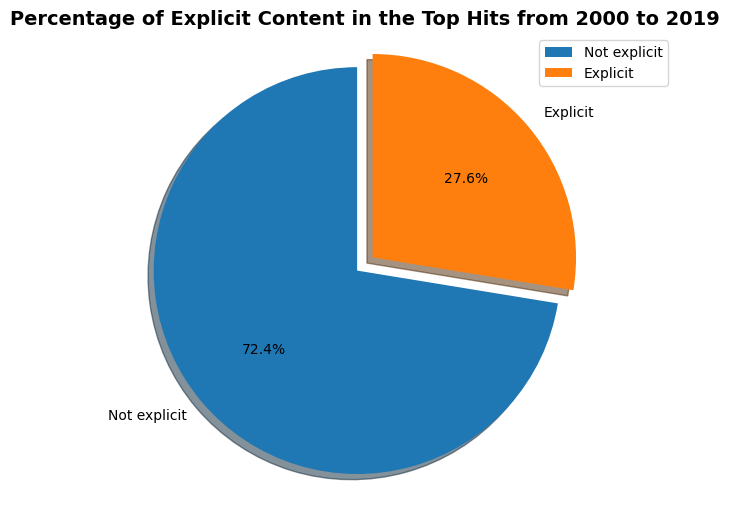

In [13]:
# Assuming explicit_or_not_explicit is a DataFrame with a 'songs' column
# Extract the values for the pie chart
not_explicit = explicit_or_not_explicit['songs'][0]  
explicit = explicit_or_not_explicit['songs'][1]      

# Create the pie chart using matplotlib
plt.figure(figsize=(8, 6))
plt.pie([not_explicit, explicit], 
        labels=['Not explicit', 'Explicit'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=(0, 0.1))  # Slightly explode the 'Explicit' slice

# Add title with bold font
plt.title('Percentage of Explicit Content in the Top Hits from 2000 to 2019', 
          fontweight='bold', fontsize=14)

# Add legend with bold font
plt.legend(fontsize=10)

# Make the plot look nice
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the figure
plt.savefig('ExplicitContentPie.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Most Popular Artists

In [14]:
# Organizing the ten most popular artists according to popularity score
top_10_artists = audio_features.groupby('artist', as_index = False)[['popularity']].sum().sort_values('popularity',
                                                               ascending=False).head(10)

top_10_artists

artist  popularity
620         Rihanna        1803
236          Eminem        1519
217           Drake        1424
127   Calvin Harris        1356
195    David Guetta        1185
118  Britney Spears        1140
708    Taylor Swift        1125
156     Chris Brown        1080
384      Kanye West        1049
388      Katy Perry        1033

/var/folders/rm/b67f92y96cv78lmnchtgg2hm0000gn/T/ipykernel_37747/1829242559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10_artists, x = 'popularity', y = 'artist', orient = 'h' ,palette='magma')


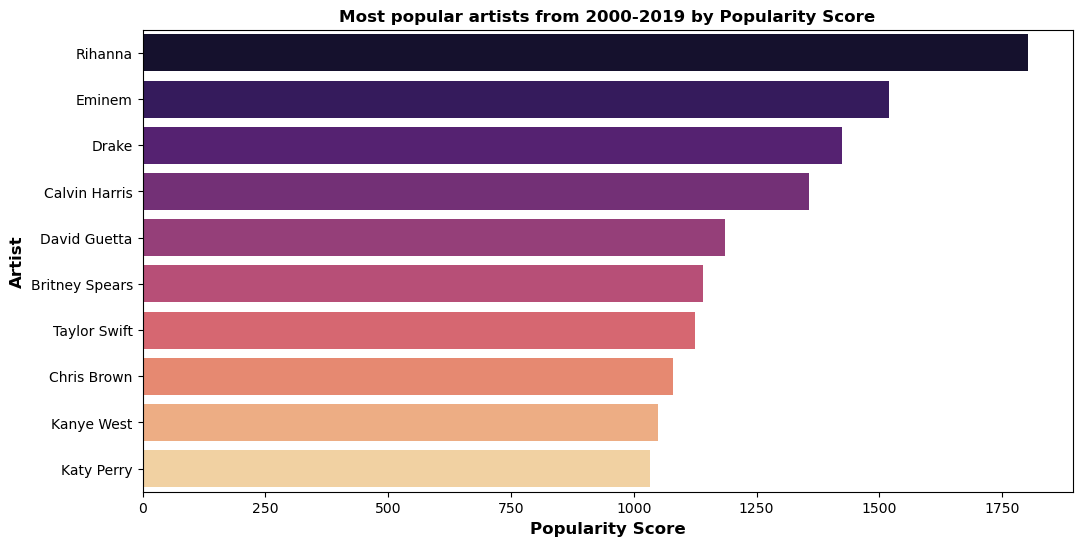

In [15]:
# Visualising most popular artists
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = top_10_artists, x = 'popularity', y = 'artist', orient = 'h' ,palette='magma')
plt.ylabel('Artist', fontweight = 'bold', size = 12)
plt.xlabel('Popularity Score', fontweight = 'bold', size = 12)
plt.title('Most popular artists from 2000-2019 by Popularity Score', fontweight='bold')

plt.savefig('ArtistbyPopularityScore.png')
plt.show()

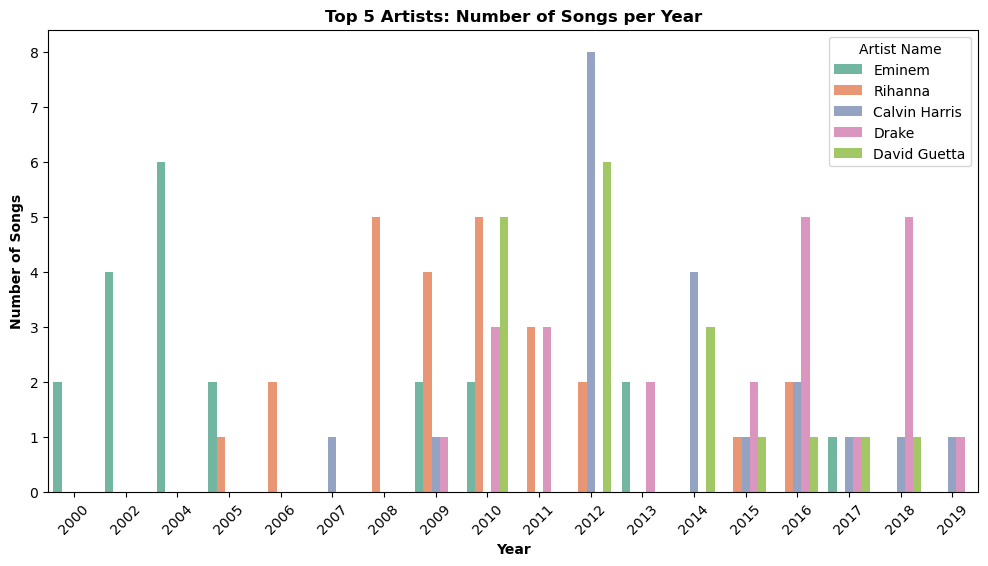

In [16]:
# Get the top 5 artists
top_artists = audio_features['artist'].value_counts().head(5).index

# Filter the original DataFrame to only include rows where the artist is in top_artists
df_top = audio_features[audio_features['artist'].isin(top_artists)]

plt.figure(figsize=(12,6))
sns.countplot(x='year', hue='artist', data=df_top, palette='Set2')
plt.title("Top 5 Artists: Number of Songs per Year", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Number of Songs", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title = "Artist Name")
plt.savefig('NumSongsPerYearbyArtist.png')
plt.show()


# Average song duration over the years (2000-2019)

In [17]:
# Creating a DataFrame with the average duration of the top hits
average_duration = audio_features[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] =average_duration['duration_ms'].apply(ms_to_min_sec)
average_duration[['year','min:sec']]

year min:sec
0   2000     4:9
1   2001     4:2
2   2002    4:13
3   2003    3:56
4   2004    3:54
5   2005    3:56
6   2006    3:58
7   2007    3:51
8   2008    3:55
9   2009    3:56
10  2010    3:40
11  2011    3:48
12  2012    3:44
13  2013    3:50
14  2014    3:40
15  2015    3:38
16  2016    3:40
17  2017    3:32
18  2018    3:29
19  2019    3:16

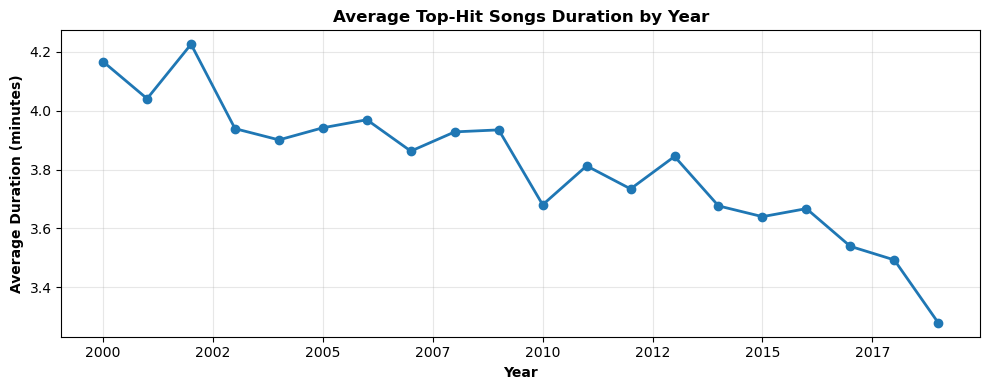

In [18]:
df = average_duration.copy()
df["duration_min"] = df["duration_ms"] / 60000.0

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df["year"], df["duration_min"], marker="o", linewidth=2, color="#1f77b4")

from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}'))

ax.set_title("Average Top-Hit Songs Duration by Year", fontweight='bold')
ax.set_xlabel("Year", fontweight='bold')
ax.set_ylabel("Average Duration (minutes)", fontweight='bold')
ax.grid(alpha=0.3)
fig.tight_layout()


plt.savefig('AvgDurationYearLine.png')
plt.show()

In [19]:
overall_avg_min = audio_features["duration_ms"].mean() / 60000.0
print(f"Overall average duration: {overall_avg_min:.2f} minutes")

Overall average duration: 3.80 minutes


# Audio Features Distribution

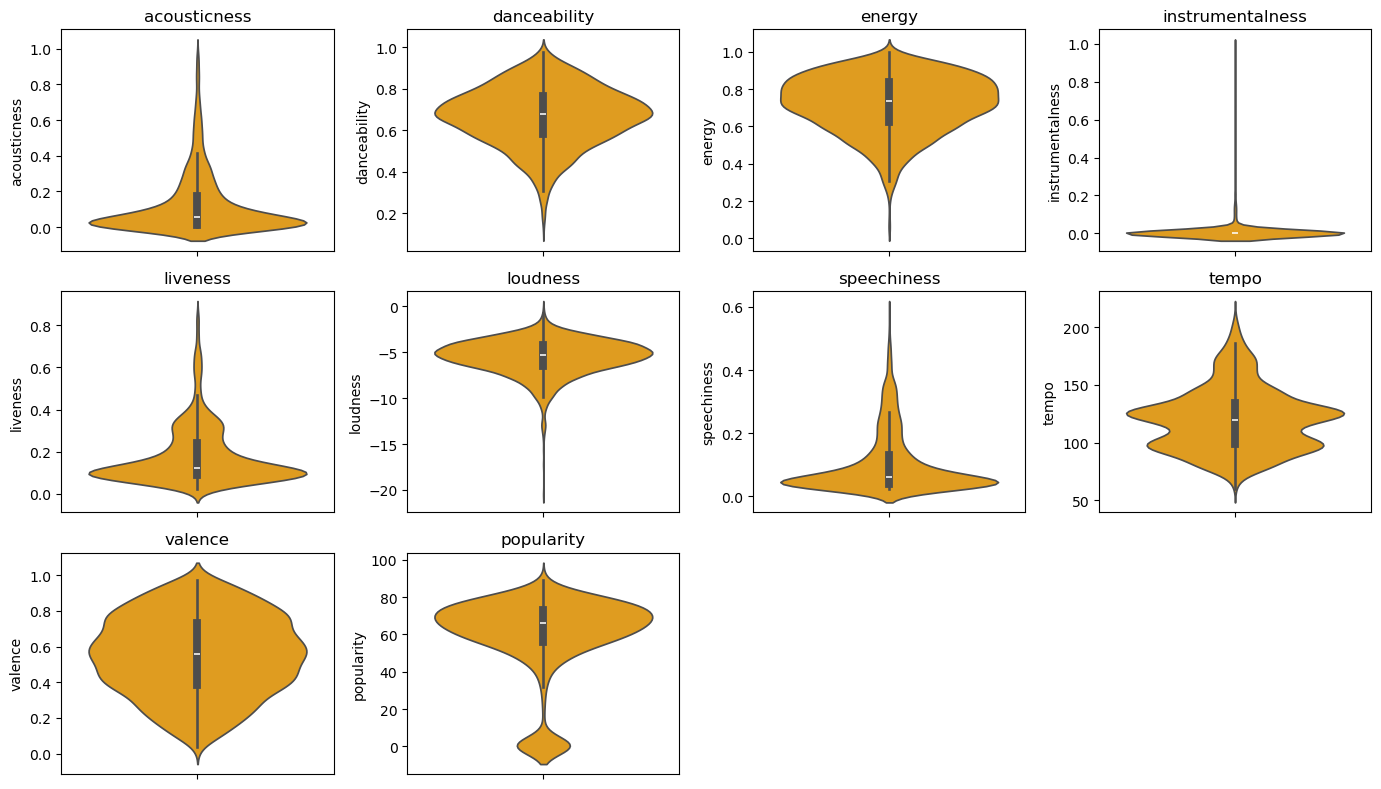

In [20]:
# Plot violin plots (for comparing shapes of the distributions)
features = [
    'acousticness','danceability','energy','instrumentalness',
    'liveness','loudness','speechiness','tempo','valence','popularity'
]

plt.figure(figsize=(14,8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.violinplot(y=audio_features[feature], color="orange")
    plt.title(feature)
plt.tight_layout()

plt.savefig('AudioFeatureDist.png')
plt.show()

# Key and Mode

In [21]:
# Creating a dataframe for key and mode 
key_mode = audio_features.groupby(['key', 'mode']).size().unstack(fill_value=0).reset_index()

# Renaming columns 0 to minor and 1 to major
key_mode.rename(columns = {0: 'minor', 1: 'major'}, inplace = True)

# Organising key names according to pitch class
key_mode.key.replace({0:'C',1:'C♯/D♭',2:'D',3:'E♭/D♯',4:'E',5:'F',6:'F♯/G♭',
                        7:'G',8:'A♭/G♯',9:'A',10:'B♭/A♯',11:'B'}, inplace=True)

# Creating a column containing the total number of songs
key_mode['songs'] = key_mode['minor'] + key_mode['major']

# View Table
key_mode

/var/folders/rm/b67f92y96cv78lmnchtgg2hm0000gn/T/ipykernel_37747/878089433.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  key_mode.key.replace({0:'C',1:'C♯/D♭',2:'D',3:'E♭/D♯',4:'E',5:'F',6:'F♯/G♭',


mode    key  minor  major  songs
0         C     65    128    193
1     C♯/D♭     91    168    259
2         D     32    123    155
3     E♭/D♯     31     27     58
4         E     76     48    124
5         F    111     67    178
6     F♯/G♭     79     73    152
7         G     56    139    195
8     A♭/G♯     57    112    169
9         A     71     84    155
10    B♭/A♯     75     49    124
11        B    129     67    196

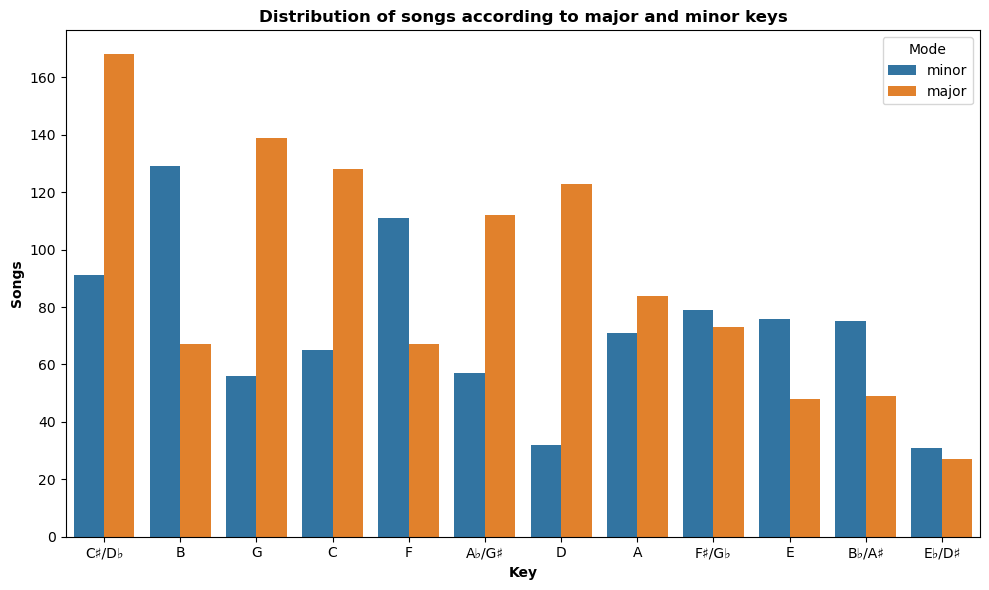

In [22]:
# Calculate total songs per key (sum of minor and major)
key_mode['songs'] = key_mode['minor'] + key_mode['major']

# Sort keys by total songs
order = key_mode.sort_values('songs', ascending=False)['key'].tolist()

# Wide -> long for hue by mode
km_long = key_mode.melt(
    id_vars='key', value_vars=['minor','major'],
    var_name='mode', value_name='songs_count'
)

plt.figure(figsize=(10,6))
sns.barplot(data=km_long, x='key', y='songs_count', hue='mode', order=order)
plt.title('Distribution of songs according to major and minor keys', fontweight = 'bold')
plt.xlabel('Key', fontweight = 'bold')
plt.ylabel('Songs', fontweight = 'bold')
plt.legend(title='Mode')

plt.tight_layout()

plt.savefig('Song distribution according to keys.png')
plt.show()

# Tempo (BPM) Distribution

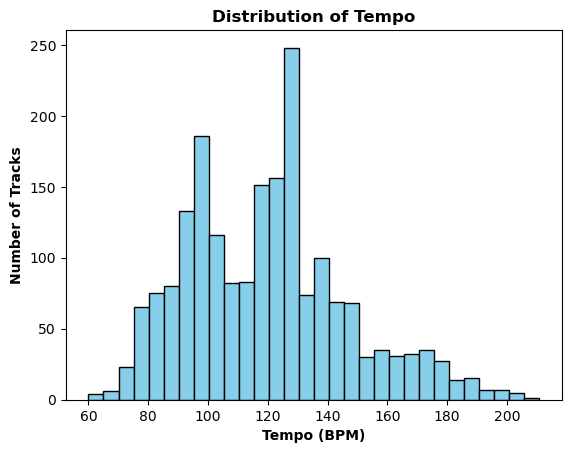

In [23]:
plt.hist(audio_features['tempo'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tempo', fontweight = 'bold')
plt.xlabel('Tempo (BPM)', fontweight = 'bold')
plt.ylabel('Number of Tracks', fontweight = 'bold')
plt.savefig('tempo_distribution.png')
plt.show()

# Danceability Distribution

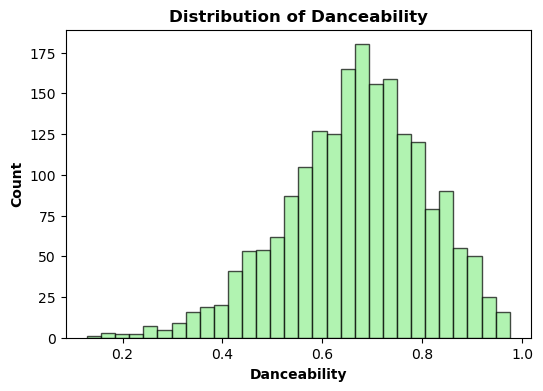

In [24]:
# Create a histogram for dancebility
plt.figure(figsize=(6,4))
plt.hist(audio_features['danceability'], bins=30, color = 'lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Danceability", fontweight='bold')
plt.xlabel("Danceability", fontweight='bold')
plt.ylabel("Count", fontweight='bold')


plt.savefig('dance_distribution.png')
plt.show()

# Energy Distribution

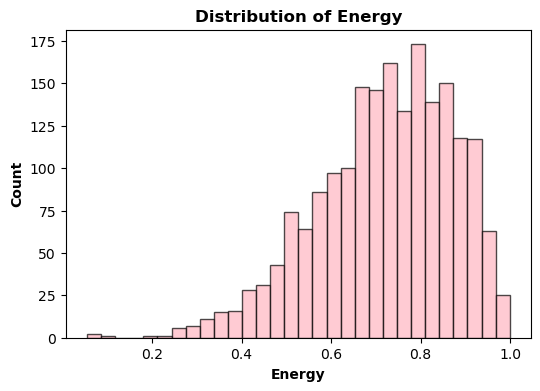

In [25]:
# Create a histogram for energy
plt.figure(figsize=(6,4))
plt.hist(audio_features['energy'], bins=30, color = 'lightpink', edgecolor='black', alpha=0.7)
plt.title("Distribution of Energy", fontweight='bold')
plt.xlabel("Energy", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.savefig('energy_distribution.png')
plt.show()

# Valence Distribution

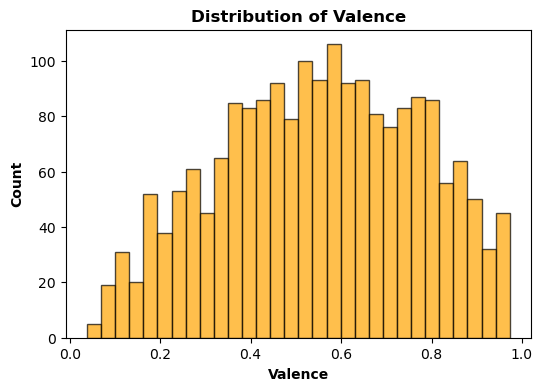

In [26]:
# Create a histogram for valence
plt.figure(figsize=(6,4))
plt.hist(audio_features['valence'], bins=30, color = 'orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Valence", fontweight='bold')
plt.xlabel("Valence", fontweight='bold')
plt.ylabel("Count", fontweight='bold')


plt.savefig('valence_distribution.png')
plt.show()

# Distribution of Speechiness

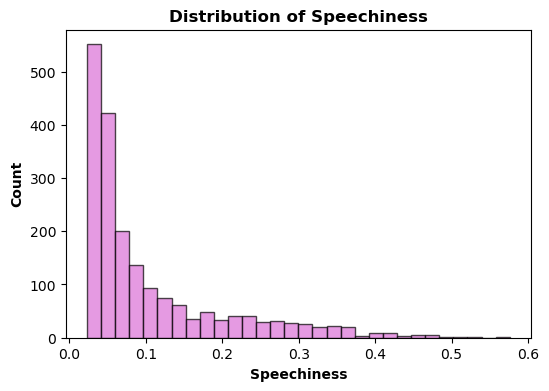

In [27]:
# Create a histogram for speechiness
plt.figure(figsize=(6,4))
plt.hist(audio_features['speechiness'], bins=30, color = 'orchid', edgecolor='black', alpha=0.7)
plt.title("Distribution of Speechiness", fontweight='bold')
plt.xlabel("Speechiness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.savefig('speech_distribution.png')
plt.show()

# Distribution of Acousticness

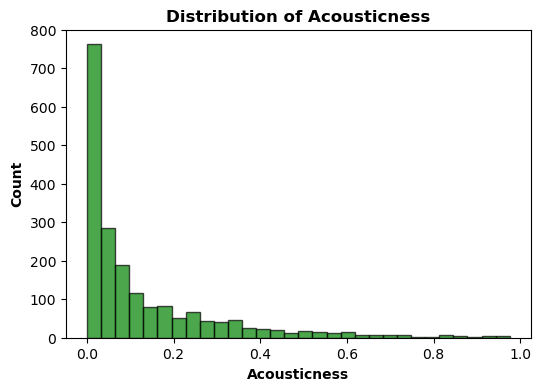

In [28]:
# Create a histogram for Acousticness
plt.figure(figsize=(6,4))
plt.hist(audio_features['acousticness'], bins=30, color = 'green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Acousticness", fontweight='bold')
plt.xlabel("Acousticness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.savefig('acoustic_distribution.png')
plt.show()

# Distribution of Liveness

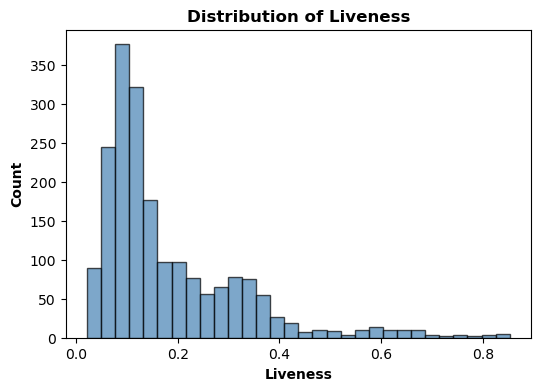

In [29]:
# Create a histogram for Liveness
plt.figure(figsize=(6,4))
plt.hist(audio_features['liveness'], bins=30, color = 'steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Liveness", fontweight='bold')
plt.xlabel("Liveness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.savefig('live_distribution.png')
plt.show()

# Distribution of Loudness

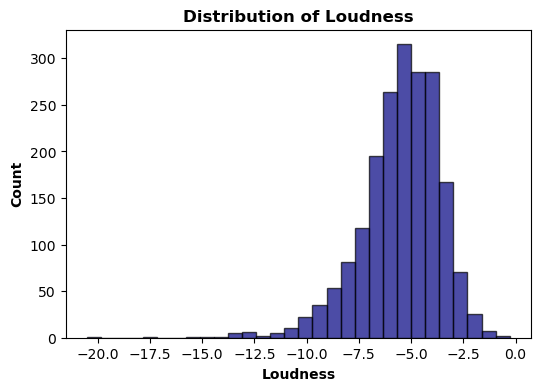

In [30]:
# Create a histogram for loudness
plt.figure(figsize=(6,4))
plt.hist(audio_features['loudness'], bins=30, color = 'navy', edgecolor='black', alpha=0.7)
plt.title("Distribution of Loudness", fontweight='bold')
plt.xlabel("Loudness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.savefig('loud_distribution.png')
plt.show()

# Energy vs Loudness

In [31]:
corr_value = audio_features['energy'].corr(audio_features['loudness'])
print(f"Pearson correlation between energy and loudness: {corr_value:.3f}")

Pearson correlation between energy and loudness: 0.654


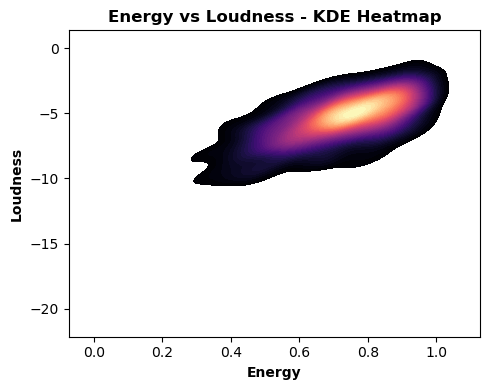

In [32]:
plt.figure(figsize=(5,4))
sns.kdeplot(data=audio_features, x='energy', y='loudness', fill=True, cmap='magma', thresh=0.05, levels=50)
plt.title('Energy vs Loudness - KDE Heatmap', fontweight = 'bold')
plt.xlabel("Energy", fontweight = 'bold')
plt.ylabel("Loudness", fontweight = 'bold')
plt.tight_layout()


plt.savefig('engvsloud.png')
plt.show()

**Observations:**
1. Direction: Upward tilt of the densest region = positive association (as loudness increases, energy tends to increase). Flat/no tilt = little to no monotonic relation. 
2. Strength: Visual tightness along a line corresponds to a stronger correlation. Cross-check the Pearson correlation number computed earlier; values near +1 confirm a strong positive trend, while values around 0 indicate a weak/none. In this case, it is 0.654, which implies that it's a strong positive trend.

# Valence vs Tempo

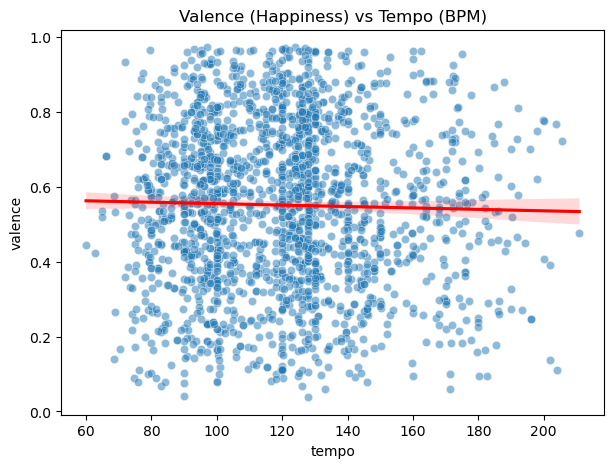

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="tempo", y="valence", data=audio_features, alpha=0.5)
sns.regplot(x="tempo", y="valence", data=audio_features, scatter=False, color="red")
plt.title("Valence (Happiness) vs Tempo (BPM)")
plt.savefig('valvstempo.png')
plt.show()

# Energy vs. Valence Mood Quadrants

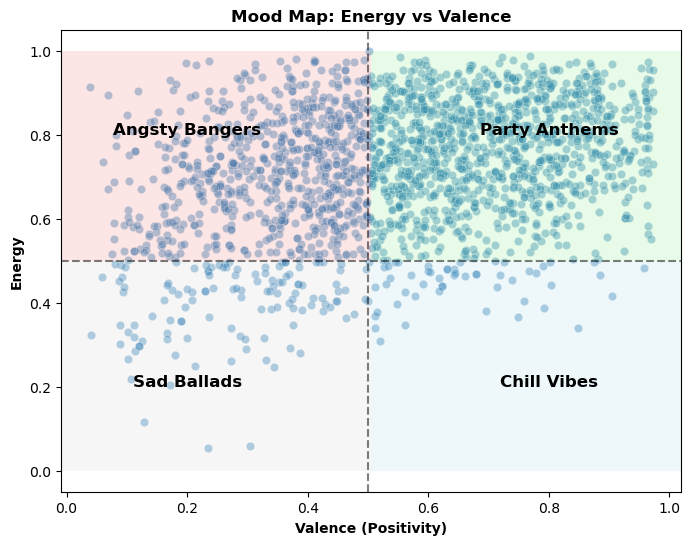

In [34]:
plt.figure(figsize=(8,6))
ax = plt.gca()

sns.scatterplot(x='valence', y='energy', data=audio_features, alpha=0.4)

# Shaded quadrants
ax.axhspan(0.5, 1, xmin=0.5, xmax=1, facecolor='lightgreen', alpha=0.2)  
ax.axhspan(0.5, 1, xmin=0, xmax=0.5, facecolor='lightcoral', alpha=0.2)  
ax.axhspan(0, 0.5, xmin=0.5, xmax=1, facecolor='lightblue', alpha=0.2)   
ax.axhspan(0, 0.5, xmin=0, xmax=0.5, facecolor='lightgray', alpha=0.2) 


# Divider lines
plt.axhline(0.5, color='black', linestyle='--', alpha=0.5)
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)

# Labels
plt.annotate("Party Anthems", xy=(0.8,0.8), fontsize=12, fontweight='bold', ha='center')
plt.annotate("Angsty Bangers", xy=(0.2,0.8), fontsize=12, fontweight='bold', ha='center')
plt.annotate("Chill Vibes", xy=(0.8,0.2), fontsize=12, fontweight='bold', ha='center')
plt.annotate("Sad Ballads", xy=(0.2,0.2), fontsize=12, fontweight='bold',  ha='center')

# Titles and Labels
plt.title("Mood Map: Energy vs Valence", fontweight='bold')
plt.xlabel("Valence (Positivity)", fontweight = 'bold')
plt.ylabel("Energy", fontweight='bold')


plt.savefig('MoodQuadrants.png')
plt.show()

# Correlation between Measures

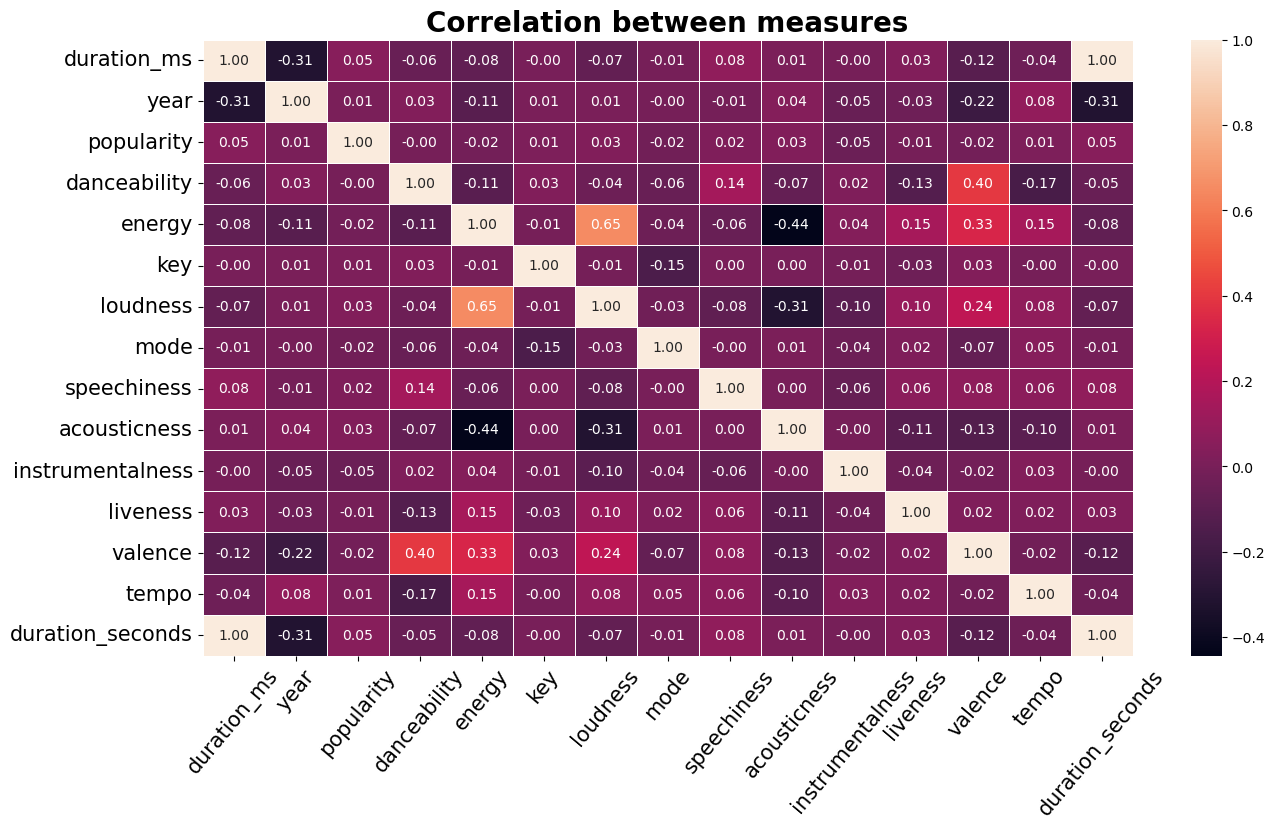

In [35]:
# Filter out non-numeric columns or convert them to numeric
numeric_df = audio_features.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,8))
# Use the numeric dataframe for correlation
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, fmt='.2f')
plt.title('Correlation between measures', size=20, fontweight = 'bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=50)

plt.savefig('CorrelationMatrix.png')
plt.show()

# Genre Distribution across Top Hits from 2000-2019

In [36]:
genre_dist = audio_features['genre'].value_counts().rename_axis('Genre').reset_index(name='Total')

genre_dist.head(10)

Genre  Total
0                             pop    416
1                    hip hop, pop    275
2               hip hop, pop, R&B    240
3           pop, Dance/Electronic    219
4                        pop, R&B    173
5                         hip hop    121
6  hip hop, pop, Dance/Electronic     78
7                            rock     57
8                       rock, pop     41
9                Dance/Electronic     40

/opt/anaconda3/lib/python3.12/site-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




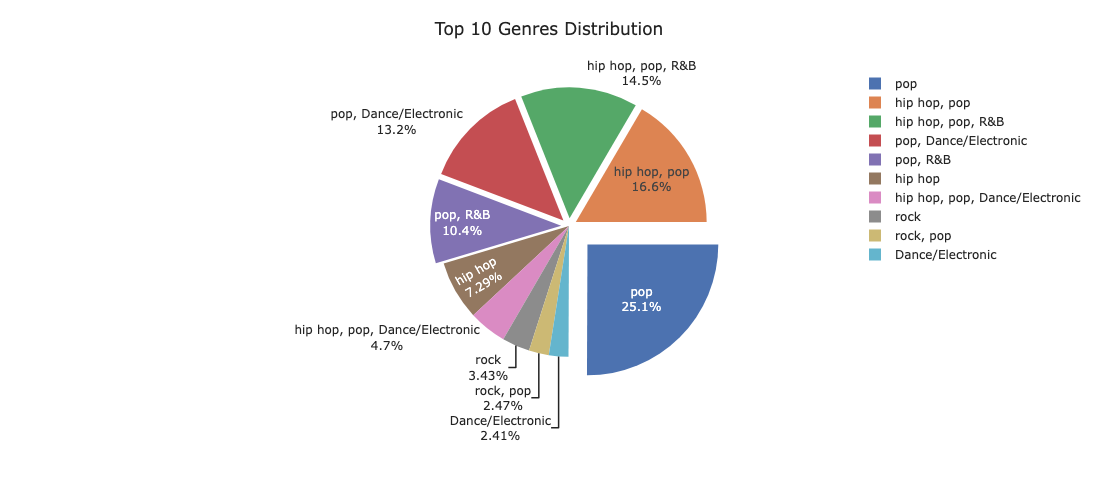

<Figure size 1400x600 with 0 Axes>

In [37]:
plt.figure(figsize=(14, 6))
fig = px.pie(genre_dist.head(10), names = 'Genre',
      values = 'Total', template = 'seaborn', title = 'Top 10 Genres Distribution')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.update_layout(autosize=False, width=1000, height=500, margin=dict(l=40,r=40,t=60,b=40))


plt.savefig('GenreDistPie.png')
fig.show()

**Observations:**
Most top hits from 2000-2019 can be categorised as pop, hip hop, R&B, Dance/Electronic and rock. Among these categories, pop seems to be the most popular and makes up most of the songs in the dataset (25.1%).

# Genre Evolution

In [38]:

# Count genres across the dataset
top10_genres = audio_features['genre'].value_counts().nlargest(10).index

# Create a new column that groups everything outside top 10 into "Other"
# There was also a bug here - using df instead of audio_features
audio_features['genre_top10'] = audio_features['genre'].where(audio_features['genre'].isin(top10_genres), 'Other')

# Group by year and genre
genre_year = audio_features.groupby(['year','genre_top10']).size().reset_index(name='count')

# Pivot to wide format (years as index, genres as columns)
genre_pivot = genre_year.pivot(index='year', columns='genre_top10', values='count').fillna(0)

# Sort columns so "Other" stays last (optional)
cols = [c for c in genre_pivot.columns if c != 'Other'] + ['Other']
genre_pivot = genre_pivot[cols]

# Preview dataframe
genre_pivot.head()

genre_top10  Dance/Electronic  hip hop  hip hop, pop  \
year                                                   
2000                      1.0      4.0           4.0   
2001                      5.0      4.0           7.0   
2002                      1.0      8.0          11.0   
2003                      1.0      1.0          18.0   
2004                      2.0     14.0          12.0   

genre_top10  hip hop, pop, Dance/Electronic  hip hop, pop, R&B   pop  \
year                                                                   
2000                                    0.0               10.0  16.0   
2001                                    0.0               19.0  25.0   
2002                                    0.0               27.0  19.0   
2003                                    0.0               11.0  15.0   
2004                                    0.0               14.0  15.0   

genre_top10  pop, Dance/Electronic  pop, R&B  rock  rock, pop  Other  
year                                                                  
2000                           4.0      11.0   1.0        1.0   22.0  
2001                           6.0      18.0   0.0        5.0   19.0  
2002                           2.0       5.0   2.0        3.0   12.0  
2003                           6.0      17.0   2.0        4.0   22.0  
2004                           5.0      15.0   4.0        0.0   15.0

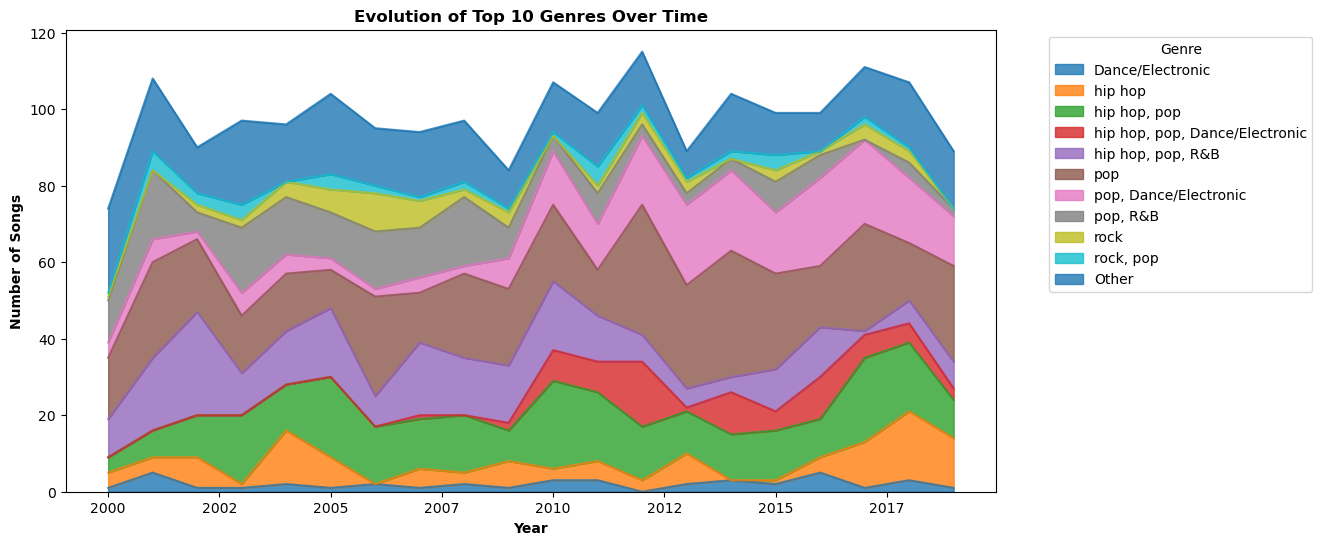

In [39]:
ax = genre_pivot.plot.area(figsize=(12,6), alpha=0.8)

from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}'))

ax.set_title('Evolution of Top 10 Genres Over Time', fontweight='bold')
ax.set_ylabel('Number of Songs', fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('GenreEvo2000–2019.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

**Observations:**
The Dance/Electronic Genre had the highest number of songs throughout 2000-2019.